In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def parse_perf_txt(str):
    res = {}
    
    str_arr = str.split("\n\n")

    for t in str_arr:
        t_arr = t.split("\n")

        t_res = {}
        for line in t_arr:
            k, v = line.split(": ")

            if k == "Image size":
                continue

            if "All" in k:
                k_arr = k.split(" ")
                n = int(k_arr[0][1:-1])
                k = k_arr[1]

            t_res[k] = float(v) / 1000.0

            if k == "All":
                res[n] = t_res

    return res

In [3]:
with open("../../../../../data/with_hyperthreading.txt") as f:
    ht_perf = f.read()

ht_perf = parse_perf_txt(ht_perf)
ht_perf

{0: {'decode': 9.095,
  'DetectLandmarksInVideo': 95.574,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.976,
  'All': 159.129},
 1: {'decode': 11.677,
  'DetectLandmarksInVideo': 11.348,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.855,
  'All': 25.957},
 2: {'decode': 3.741,
  'DetectLandmarksInVideo': 11.613,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.994,
  'All': 18.416},
 3: {'decode': 3.853,
  'DetectLandmarksInVideo': 13.64,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.945,
  'All': 20.508},
 4: {'decode': 3.615,
  'DetectLandmarksInVideo': 11.493,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 3.113,
  'All': 18.288},
 5: {'decode': 3.667,
  'DetectLandmarksInVideo': 10.901,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 3.215,
  'All': 17.845},
 6: {'decode': 4.565,
  'DetectLandmarksInVideo': 13.397,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 3.159,
  'All': 21.23},
 7: {'decode': 3.568,
  'De

In [4]:
with open("../../../../../data/without_hyperthreading.txt") as f:
    nht_perf = f.read()

nht_perf = parse_perf_txt(nht_perf)
nht_perf

{0: {'decode': 11.078,
  'DetectLandmarksInVideo': 73.211,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.926,
  'All': 145.08},
 1: {'decode': 9.374,
  'DetectLandmarksInVideo': 9.672,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.298,
  'All': 21.401},
 2: {'decode': 2.987,
  'DetectLandmarksInVideo': 9.905,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.214,
  'All': 15.159},
 3: {'decode': 3.282,
  'DetectLandmarksInVideo': 9.457,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.553,
  'All': 15.35},
 4: {'decode': 3.264,
  'DetectLandmarksInVideo': 9.759,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.604,
  'All': 15.682},
 5: {'decode': 3.251,
  'DetectLandmarksInVideo': 9.608,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 2.829,
  'All': 15.749},
 6: {'decode': 3.513,
  'DetectLandmarksInVideo': 18.249,
  'PredictStaticAUsAndComputeFeatures & convertToJSON': 3.081,
  'All': 24.927},
 7: {'decode': 4.097,
  'DetectL

In [5]:
def plot_barplot(x, title, scaled = False):
    width = 0.3  # the width of the bars

    ht_perf_values = [ht_perf[i]["All"] for i in x]
    nht_perf_values = [nht_perf[i]["All"] for i in x]
    min_value_rounded = min(ht_perf_values + nht_perf_values) // 5 * 5
    max_value_rounded = (max(ht_perf_values + nht_perf_values) // 5 + 2) * 5

    if scaled:
        fn = np.log10
    else:
        fn = lambda x: x

    fig = plt.figure(figsize=(20, 10))

    plt.bar(x - (width / 2), fn(ht_perf_values), width, label="With Hyperthreading")
    plt.bar(x + (width / 2), fn(nht_perf_values), width, label="Without Hyperthreading")

    plt.xticks([i for i in x if i % 5 == 0], fontsize=12, rotation=90)
    plt.xlabel("Frames", fontsize=16)

    plt.ylim((fn(min_value_rounded), fn(max_value_rounded)))
    plt.yticks(
        ticks=fn(np.arange(min_value_rounded, max_value_rounded, 10)),
        labels=np.arange(min_value_rounded, max_value_rounded, 10),
        fontsize=12
    )
    plt.ylabel("Time (ms)", fontsize=16)
    plt.grid(axis="y")

    plt.title(title, fontsize=20)
    plt.legend(loc="upper right", fontsize=16)

    fig.tight_layout()

    plt.show()

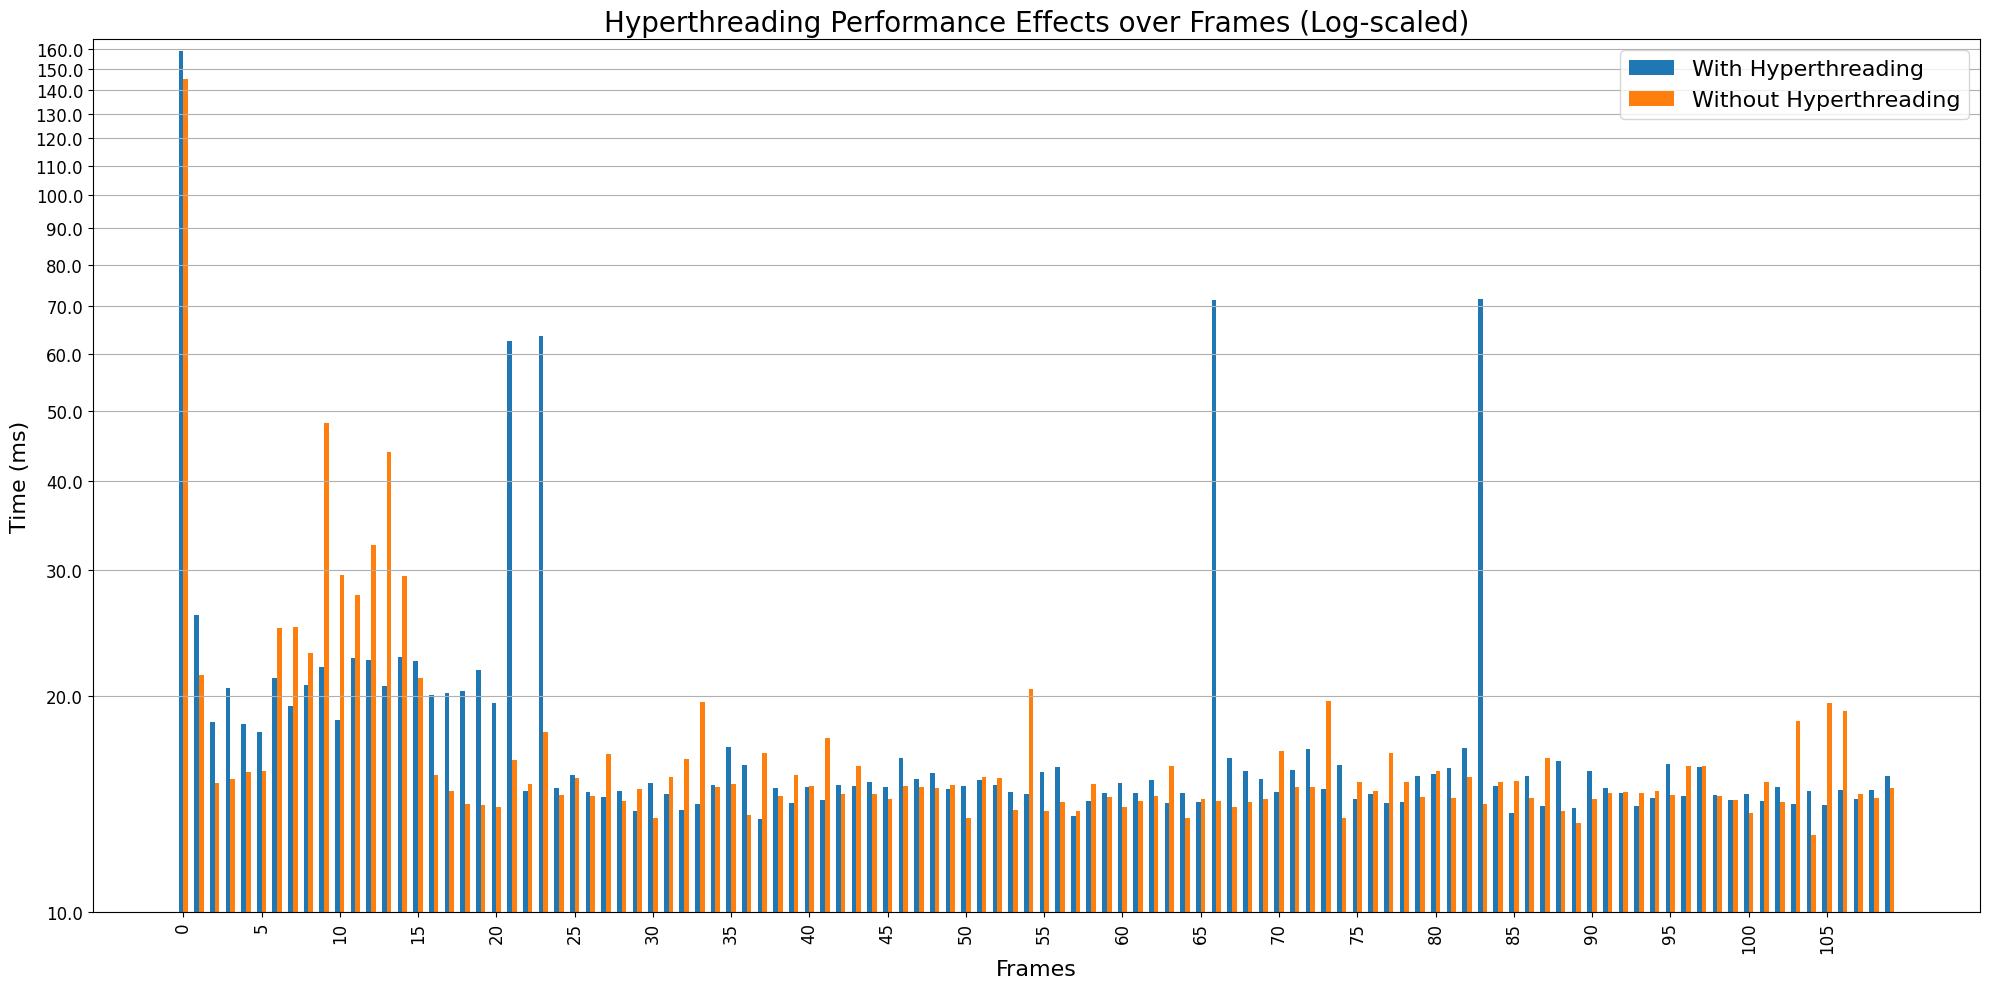

In [6]:
x = np.arange(min(len(ht_perf), len(nht_perf)))

plot_barplot(x, "Hyperthreading Performance Effects over Frames (Log-scaled)", scaled = True)

In [51]:
def plot_boxplot(x, title, showfliers, scaled = False):
    ht_perf_values = [ht_perf[i]["All"] for i in x]
    nht_perf_values = [nht_perf[i]["All"] for i in x]
    min_value_rounded = min(ht_perf_values + nht_perf_values) // 10 * 10
    max_value_rounded = (max(ht_perf_values + nht_perf_values) // 10 + 2) * 10

    if scaled:
        fn = np.log10
    else:
        fn = lambda x: x

    fig, ax = plt.subplots(figsize=(15, 6))

    ax.boxplot([fn(ht_perf_values), fn(nht_perf_values)], vert = False, showfliers=showfliers, flierprops=dict(markersize=10))
    ax.set_yticklabels(["Enabled", "Disabled"], fontsize=16)

    plt.ylabel("Hyper-threading", fontsize=18)

    if showfliers:
        plt.xlim((fn(min_value_rounded), fn(max_value_rounded)))
        plt.xticks(
            ticks=fn(np.arange(min_value_rounded, max_value_rounded, 10)),
            labels=np.arange(min_value_rounded, max_value_rounded, 10),
            rotation=45, ha="right", rotation_mode="anchor", fontsize=16
        )
    else:
        plt.xticks(rotation=45, ha="right", rotation_mode="anchor", fontsize=16)
    plt.xlabel("Time (ms)", fontsize=18)
    plt.grid(axis="x")

    plt.title(title, fontsize=20)

    plt.show()

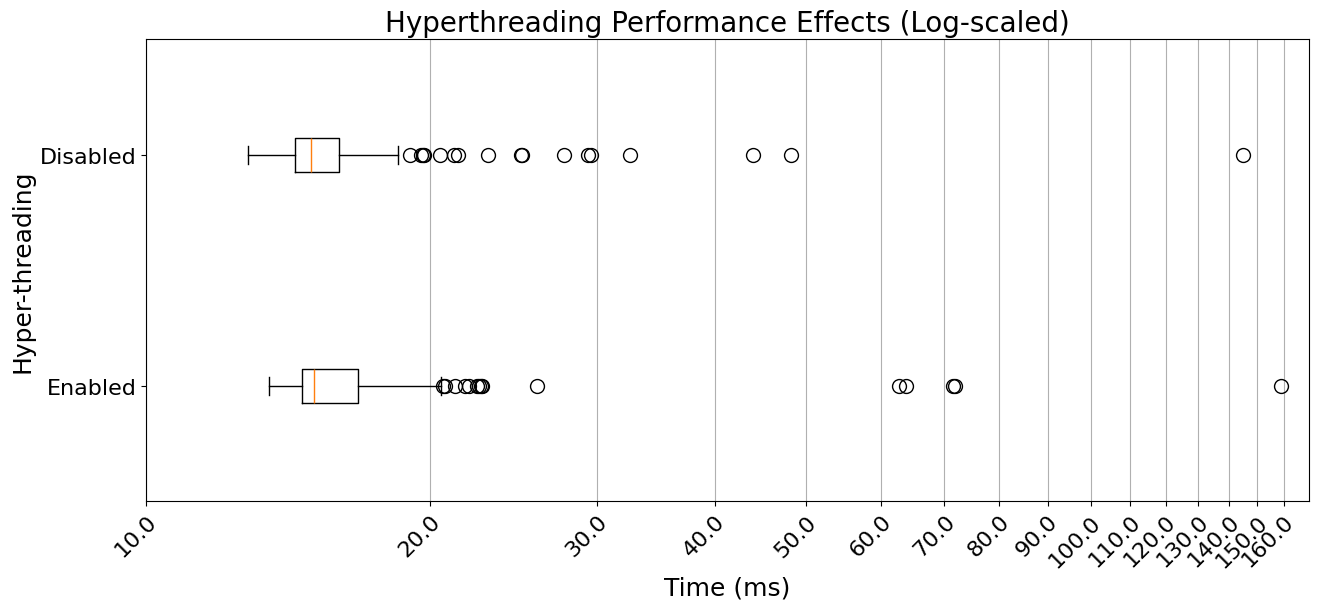

In [52]:
x = np.arange(min(len(ht_perf), len(nht_perf)))

plot_boxplot(x, "Hyperthreading Performance Effects (Log-scaled)", showfliers = True, scaled = True)

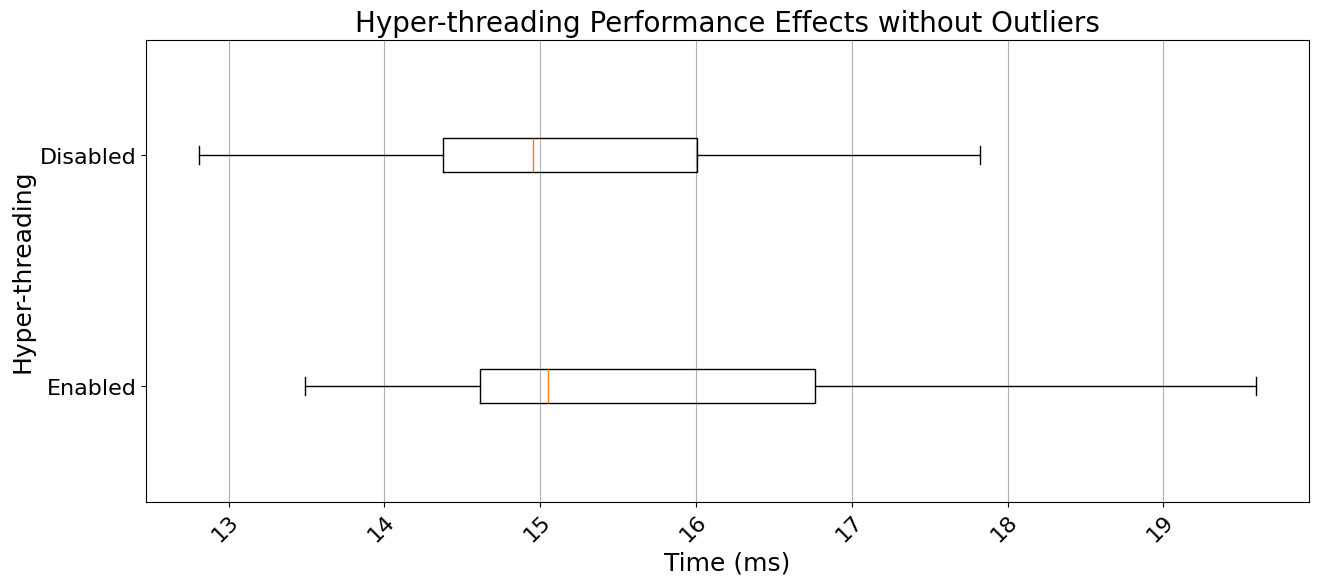

In [54]:
x = np.arange(min(len(ht_perf), len(nht_perf)))

plot_boxplot(x, "Hyper-threading Performance Effects without Outliers", showfliers = False, scaled = False)

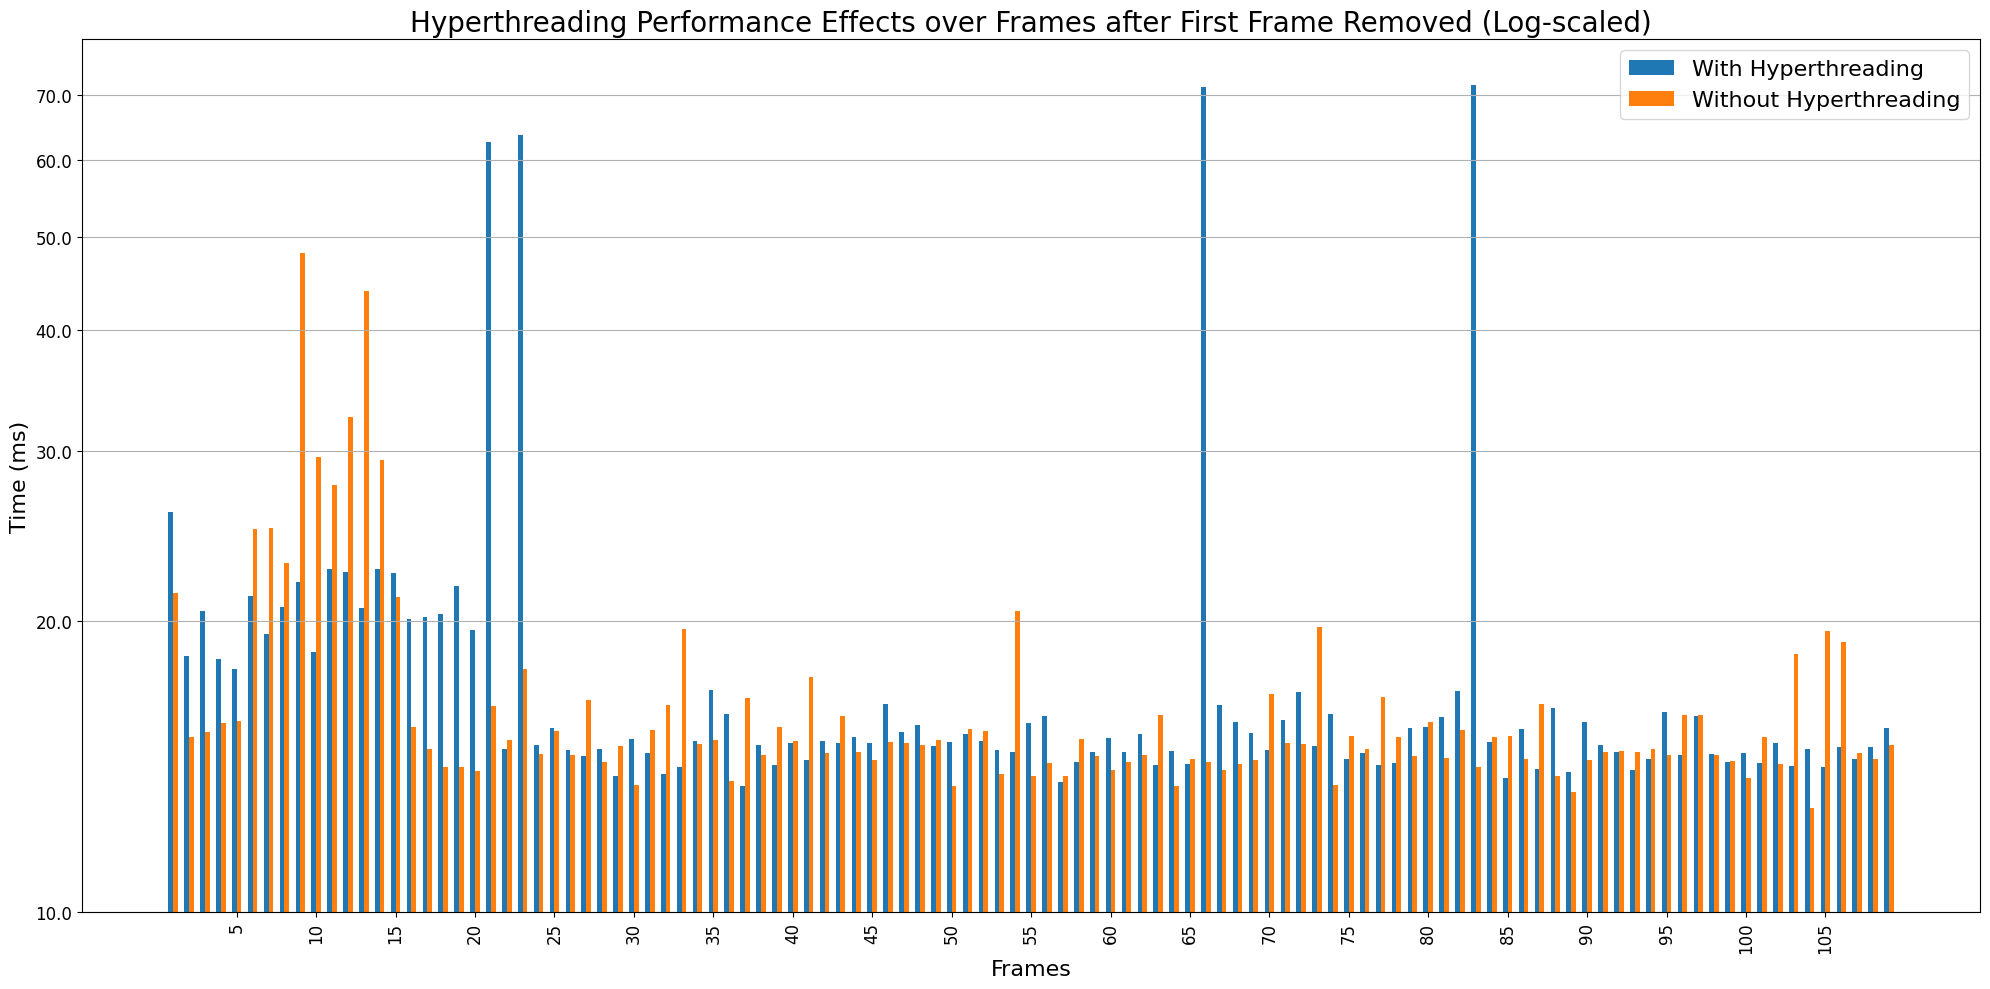

In [10]:
x = np.arange(1, min(len(ht_perf), len(nht_perf)))

plot_barplot(x, "Hyperthreading Performance Effects over Frames after First Frame Removed (Log-scaled)", scaled = True)

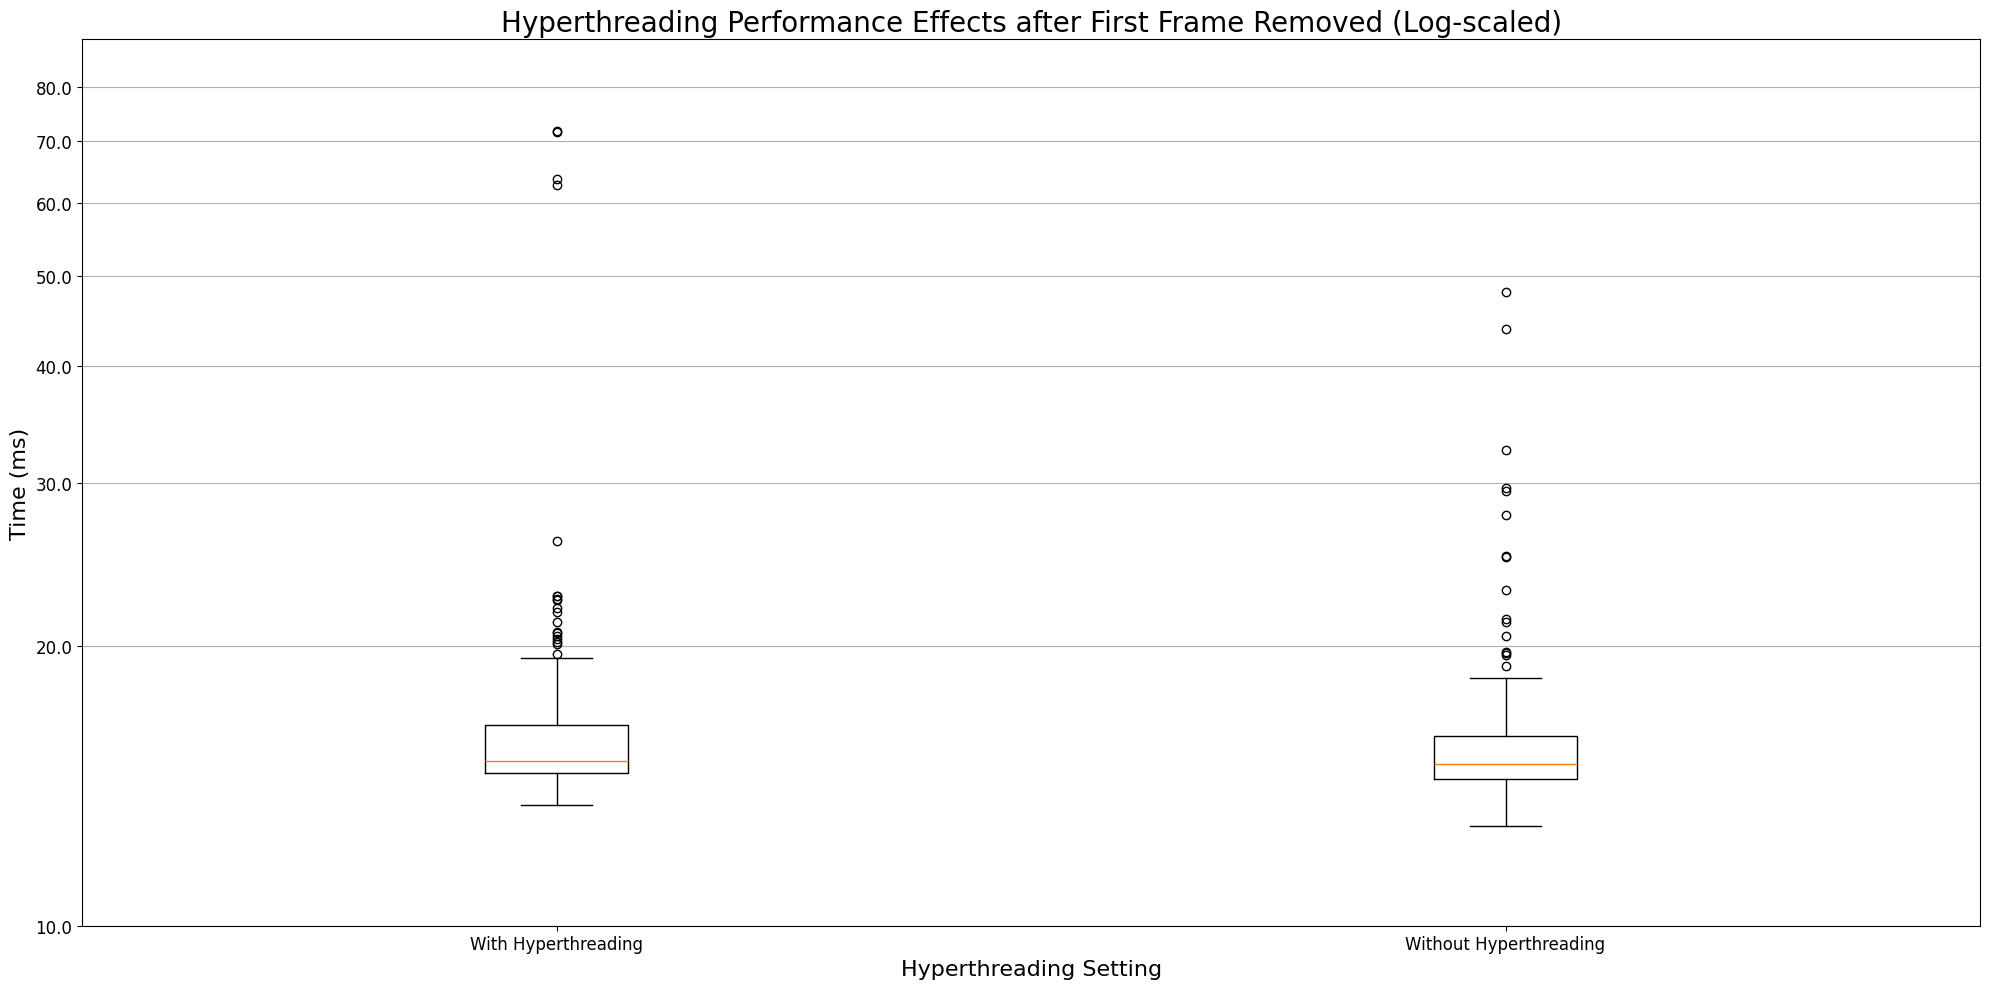

In [11]:
x = np.arange(1, min(len(ht_perf), len(nht_perf)))

plot_boxplot(x, "Hyperthreading Performance Effects after First Frame Removed (Log-scaled)", showfliers = True, scaled = True)

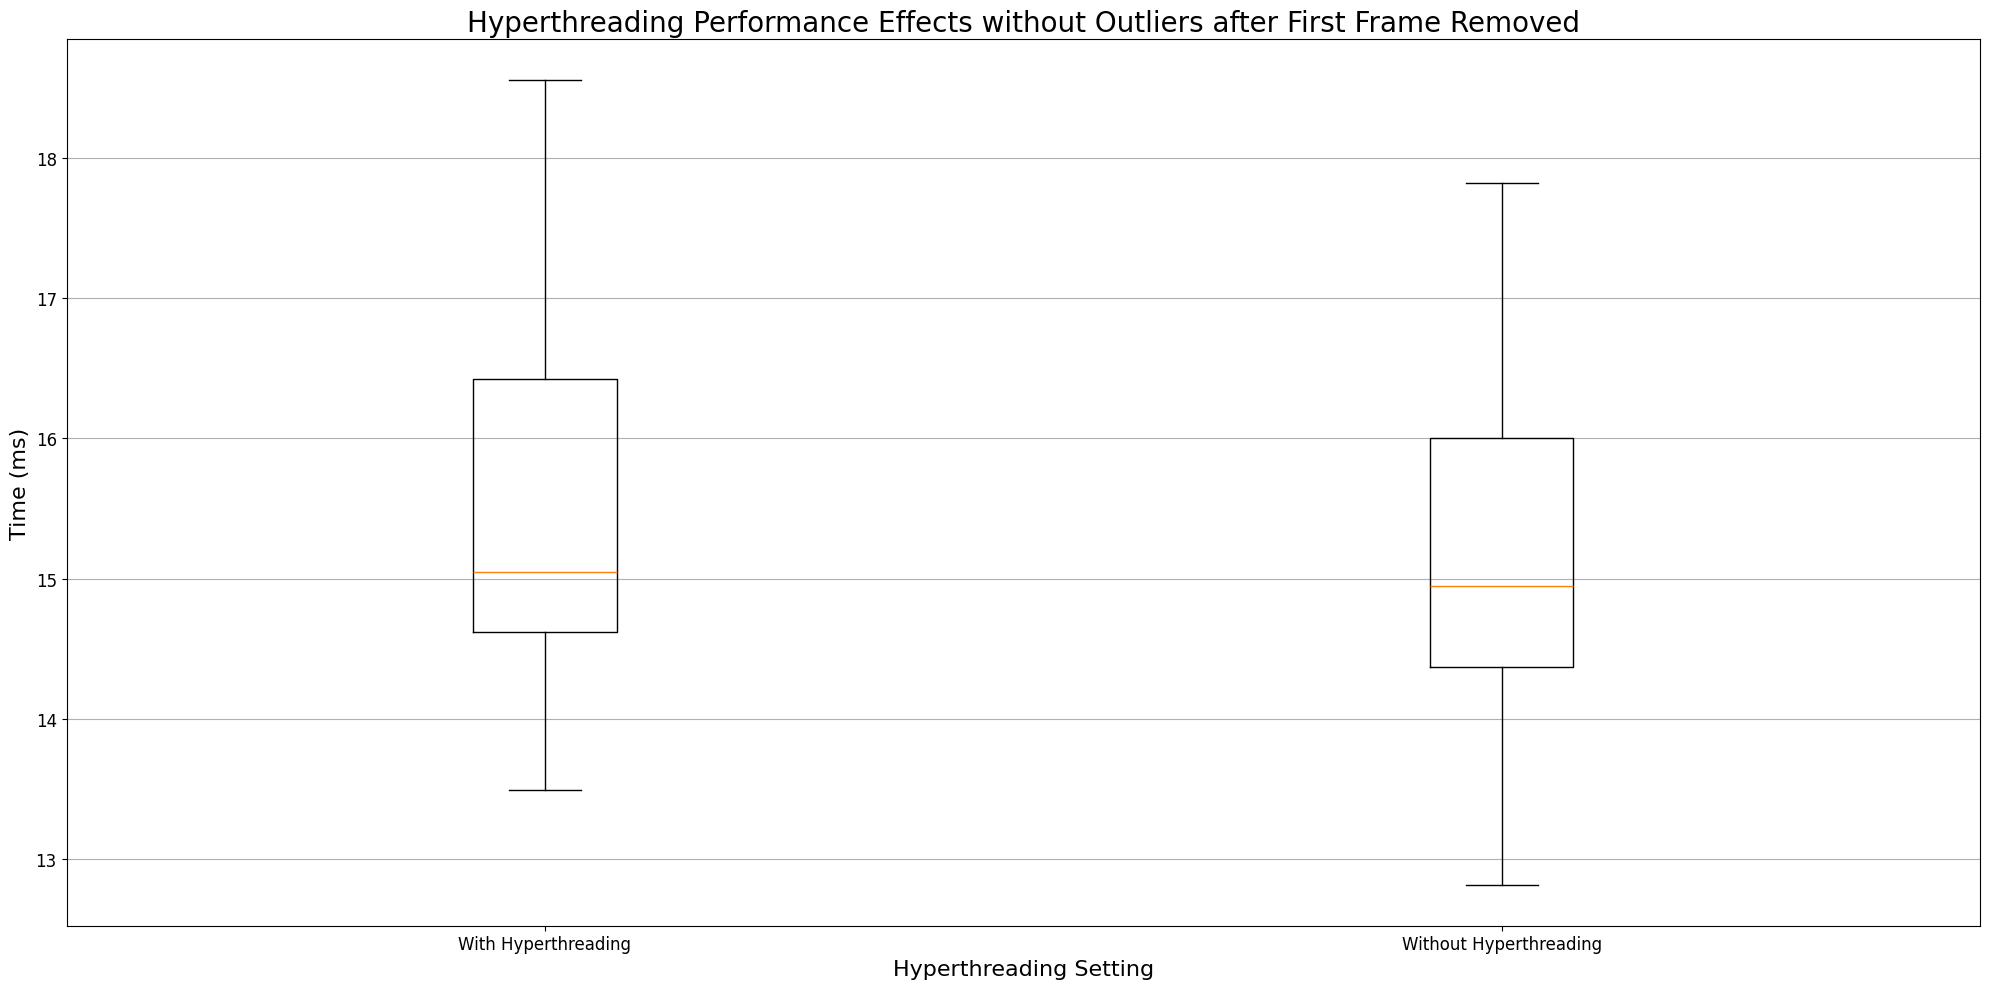

In [12]:
x = np.arange(1, min(len(ht_perf), len(nht_perf)))

plot_boxplot(x, "Hyperthreading Performance Effects without Outliers after First Frame Removed", showfliers = False, scaled = False)